## 作业二：神经网络初尝试
本次作业目的是让同学们初步上手神经网络，训练一个简单的网络表示一个多项式去拟合特定的函数，例如sin函数。

需要完成的内容
- 补全TODO标记的内容
- 尝试不同损失函数
- 尝试不同的学习率

需要提交的内容
- 补全后的代码，只需提交初始的loss和学习率设定的版本，其他的实验版本无需提交
- 实验报告，要求包含要求2、3的实验结果和简单的实验总结。

In [ ]:
#安装必要的库
! pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [4]:
#导入必要的库
import random
import math
import jittor as jt
# 使用GPU进行计算
# 若仅使用 CPU 计算，请注释下面这一行
# jt.flags.use_cuda = 1

[i 1029 08:59:52.628158 92 log.cc:351] Load log_sync: 1
[i 1029 08:59:52.631298 92 compiler.py:956] Jittor(1.3.10.0) src: /home/ubuntu/.local/lib/python3.10/site-packages/jittor
[i 1029 08:59:52.633305 92 compiler.py:957] g++ at /usr/bin/g++(11.4.0)
[i 1029 08:59:52.633727 92 compiler.py:958] cache_path: /home/ubuntu/.cache/jittor/jt1.3.10/g++11.4.0/py3.10.18/Linux-5.15.0-1xdd/AMDEPYC740224-xf1/4253/default
[i 1029 08:59:52.649166 92 install_cuda.py:96] cuda_driver_version: [12, 4]
[i 1029 08:59:52.650122 92 install_cuda.py:82] needed restart but not /home/ubuntu/miniconda3/envs/ai_course/bin/python ['-m', 'ipykernel_launcher', '--f=/run/user/1000/jupyter/runtime/kernel-v3162d7213fb237ebac47cfbf10ca14e91221acf82.json'], you can ignore this warning.
[i 1029 08:59:52.652959 92 __init__.py:412] Found /home/ubuntu/.cache/jittor/jtcuda/cuda12.2_cudnn8_linux/bin/nvcc(12.2.140) at /home/ubuntu/.cache/jittor/jtcuda/cuda12.2_cudnn8_linux/bin/nvcc.


[i 1029 08:59:52.655733 92 __init__.py:412] Found addr2line(2.38) at /usr/bin/addr2line.
[i 1029 08:59:52.747974 92 compiler.py:1013] cuda key:cu12.2.140_sm_89
[i 1029 08:59:53.105280 92 __init__.py:227] Total mem: 31.34GB, using 10 procs for compiling.
[i 1029 08:59:53.211258 92 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 1029 08:59:53.316711 92 init.cc:63] Found cuda archs: [89,]


完成下面的TODO1-2

In [5]:

class DynamicNet(jt.nn.Module):
    def __init__(self):
        """
        模型初始化，定义5个参数位随机数
        """
        super().__init__()
        self.a = jt.randn(())
        self.b = jt.randn(())
        self.c = jt.randn(())
        self.d = jt.randn(())
        #TODO1：添加一个新的参数e
        self.e = jt.randn(())

    def execute(self, x):
        """
        模型的前向传播，定义了一个多项式函数，其中包含了5个参数
        y = a + b * x + c * x^2 + d * x^3 + e * x^4 ? + e * x^5 ? (?表示可能存在)
        """
        y = self.a 
        y = y + self.b * x 
        #TODO2：添加c项和d项的计算
        y = y + self.c * x ** 2 
        y = y + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        返回多项式模型的字符串表示
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'

完成下面的TODO3-5

In [19]:
from jittor.nn import MSELoss,L1Loss


# 正常的训练过程应该从数据集中读取数据，这里为了简化，直接生成了一个sin函数的数据集
x = jt.linspace(-math.pi, math.pi, 2000)
#TODO3：生成y数据集
y = jt.sin(x)

#定义模型
model = DynamicNet()

#定义损失函数和优化器
#TODO4:尝试使用MSELoss\L1Loss
loss_func = MSELoss()

#TODO5:尝试修改学习率，建议尝试1e-4, 1e-5, 1e-6
learning_rate = 1e-5
#定义优化器，这里使用了SGD
optimizer = jt.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
for t in range(60000):
    # 模型的前向传播，计算预测值
    y_pred = model(x)
    # 计算损失
    loss = loss_func(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())
    # jittor的优化器可以直接传入loss，自动计算清空旧的梯度，反向传播得到新的梯度，更新参数
    optimizer.step(loss)
 
#打印模型的参数
print(f'Result: {model.string()}')


1999 0.10149166733026505
3999 0.06519309431314468
5999 0.04534486308693886
7999 0.03294653818011284
9999 0.02330324985086918
11999 0.016611924394965172
13999 0.012772533111274242
15999 0.009952199645340443
17999 0.008087561465799809
19999 0.0068400646559894085
21999 0.006020820699632168
23999 0.005476682912558317
25999 0.005098685622215271
27999 0.004874449223279953
29999 0.004726123996078968
31999 0.004613176919519901
33999 0.0044662668369710445
35999 0.004500539042055607
37999 0.004382747691124678
39999 0.00435761921107769
41999 0.004443707410246134
43999 0.004325335379689932
45999 0.004315854981541634
47999 0.004295444581657648
49999 0.004426445811986923
51999 0.004422925878316164
53999 0.004282176960259676
55999 0.0044255186803638935
57999 0.004431658424437046
59999 0.004274316132068634
Result: y = 0.00032677623676136136 + 0.8564882278442383 x + -0.0005895381327718496 x^2 + -0.09367059916257858 x^3 + 0.00011882228136528283 x^4 ? + 0.00011882228136528283 x^5 ?


完成下面的TODO6

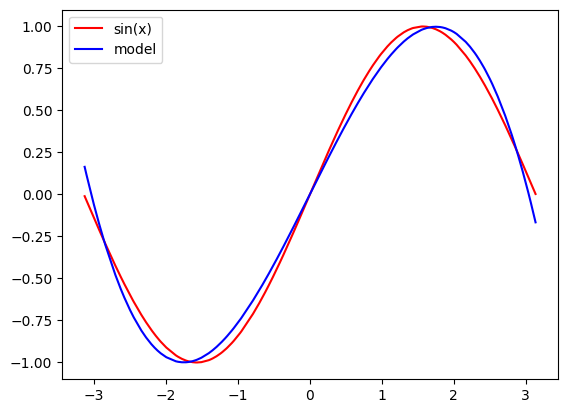

In [20]:
# 训练结果可视化
import matplotlib.pyplot as plt
# 生成简单的测试数据
x_test = jt.rand(200)*2*math.pi - math.pi
x_test = x_test.sort()[0]
# 画出sin函数的图像
plt.plot(x_test.numpy(), jt.sin(x_test).numpy(), 'r', label='sin(x)')
# 计算x_test对应的预测值
with jt.no_grad():#进行预测时不需要计算梯度，所以使用no_grad，这样可以加快计算速度
    #TODO6：计算x_test对应的预测值
    y_test_pred = model(x_test)
plt.plot(x_test.numpy(), y_test_pred.numpy(), 'b', label='model')
plt.legend()
#记得修改保存的图片名称
plt.savefig("result_mse_1e_5.png")
plt.show()
